# PRÁCTICA 3 || TIV

Primaremente importaremos todos los recursos necesarios para el desarrollo de la práctica.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import filters
from skimage.data import camera
from skimage.util import random_noise
from skimage import feature, color, data, util, exposure
from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star,
                                binary_erosion, binary_dilation, binary_opening, binary_closing,
                               remove_small_holes, label, convex_hull_image, skeletonize, thin, reconstruction,
                               opening, closing, dilation, erosion)
from skimage.filters import threshold_otsu

C:\Users\fmaco\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## 1) Leer y representar la imagen riceBGgradient.tif

Primeramente leemos la imagen y la guardamos en una variable, al igual que se ha venido haciendo en anteriores prácticas, para así poder trabajar con ella:

formato: TIFF
(ancho, alto) = (600, 600)
modo:  L


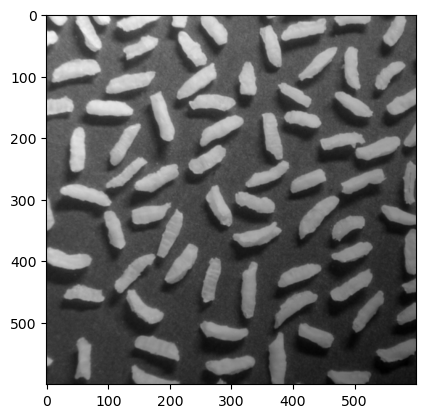

In [2]:
img1 = Image.open('images/riceBGgradient.tif')

#Se muestran algunas característica de la image a tratar
print('formato:', img1.format)
print('(ancho, alto) =', img1.size)
print('modo: ', img1.mode)

plt.figure()
plt.imshow(img1, cmap='gray')

## 2) Intenta separar los granos del fondo estableciendo un umbral

Para poder hacer un umbral adecuadamente se deberá ver el histograma de la imagen a tratar para poder tener un criterio a la hora de seleccionar los umbrales.

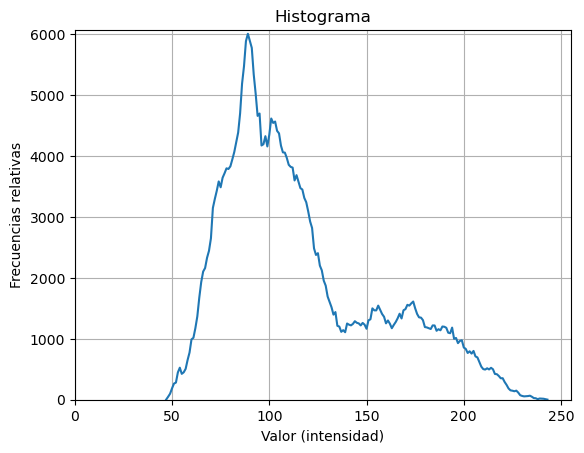

In [3]:
img1 = np.array(img1) #Se convierte la imagen en un array de numpy.
#Representación del histograma.
img_hist, bins = exposure.histogram(img1, normalize=False)
plt.plot(bins, img_hist)
plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.title('Histograma')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

In [4]:
#Prueba 1
th1, th2 = 50 , 175 #Umbrales seleccionados para crear la máscara que nos permitirá extraer los granos de arroz.
mask = np.logical_not(np.logical_and(img1[:,:] >= th1, img1[:,:] <= th2)) #Creación de la máscara.

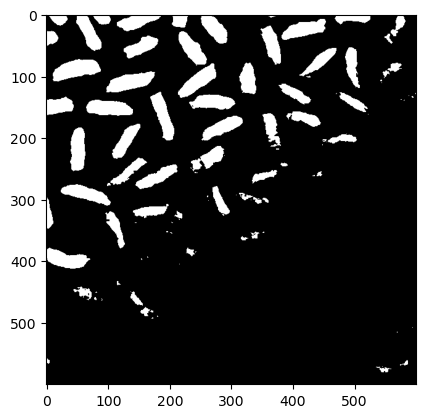

In [5]:
plt.imshow(mask, cmap='gray') #Muestra de la máscara. 

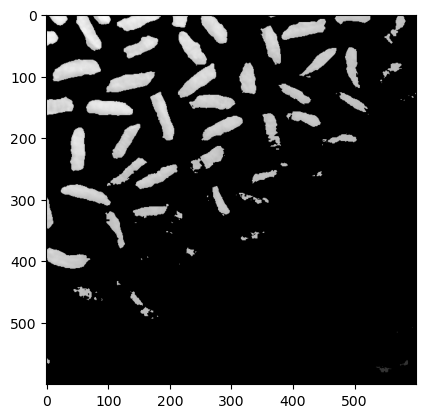

In [6]:
img1_1 = np.multiply(img1, mask) #Multiplicación de la máscara con la imagen original para poder extraer los granos.
plt.imshow(img1_1, cmap='gray')

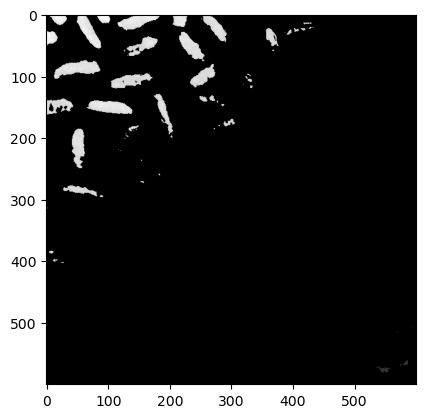

In [7]:
#Prueba 2. Cambio umbrales.
th1, th2 = 50 , 200  #Umbrales seleccionados para crear la máscara que nos permitirá extraer los granos de arroz.
mask = np.logical_not(np.logical_and(img1[:,:] >= th1, img1[:,:] <= th2)) #Creación de la máscara.
img1_2 = np.multiply(img1, mask) #Multiplicación de la máscara con la imagen original para poder extraer los granos.
plt.imshow(img1_2, cmap='gray')

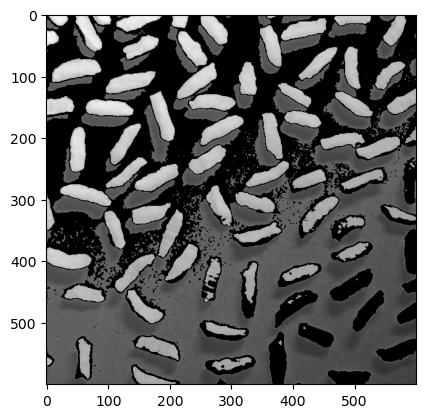

In [8]:
#Prueba 3. Cambio umbrales.
th1, th2 = 100 , 150 #Umbrales seleccionados para crear la máscara que nos permitirá extraer los granos de arroz.
mask = np.logical_not(np.logical_and(img1[:,:] >= th1, img1[:,:] <= th2)) #Creación de la máscara.
img1_3 = np.multiply(img1, mask) #Multiplicación de la máscara con la imagen original para poder extraer los granos.
plt.imshow(img1_3, cmap='gray')

A ojo de los resultados, y tras haber hecho tres pruebas distintas con distintos valores, no se consigue un resultado final satisfactorio.

## 3) Como habrás visto, no es posible obtener un resultado satisfactorio debido a la inhomogeneidad en la iluminación. Utiliza una transformación morfológica top-hat para corregir la iluminación, tal y como se ha hecho en clase

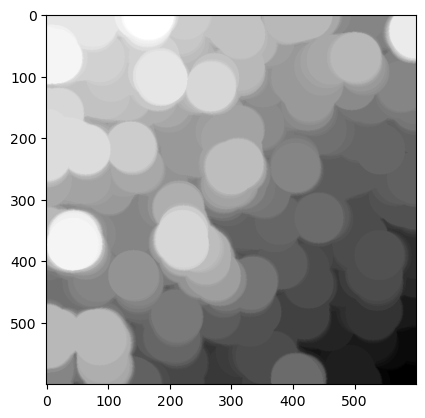

In [9]:
#Se estima la variación de iluminación del fondo con una apertura
fondo = opening(img1, disk(40)) #variable que guarda una apertura de la imagen a tratar con una circunferencia de radio 40.
plt.imshow(fondo, cmap='gray')

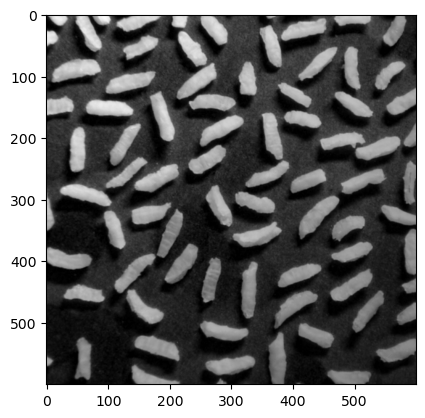

In [10]:
plt.imshow(img1-fondo, cmap='gray') #Se muestra la homogeneización haciendo una resta entre la imagen a tratar y la variable fondo que se ha creado.

## 4) Busca ahora un umbral. Para buscar el umbral, puedes ayudarte con la función “skimage.filters.threshold_otsu”

La manera de proceder para usar la función threshold_otsu se ha basado en la busqueda de información de dicha función dentro de la web de skimage, la cual mediante un ejemplo explica perfectamente como utilizar dicha función.

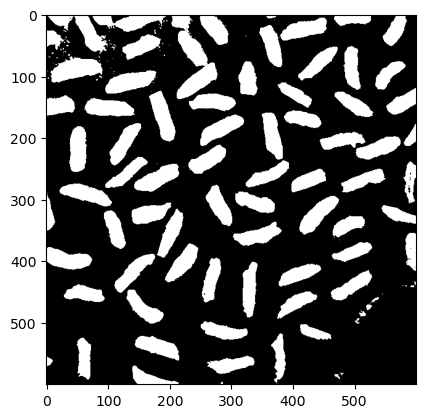

In [11]:
thresh = threshold_otsu(img1) #Valor de umbral dado por la función
binary = np.logical_not(img1 <= thresh) #máscara creada con dicho umbral
plt.imshow(binary, cmap= 'gray')

El umbral dado por la función otsu es:  134


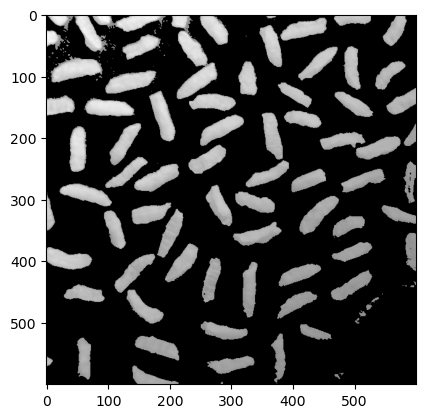

In [12]:
plt.imshow(np.multiply(img1,binary), cmap= 'gray') #Se multiplica la máscara con la imagen original y se extraen los granos de arroz.
print('El umbral dado por la función otsu es: ', thresh) #Se muestra el valor del threshold hayado por la función.

Como se puede ver, este valor de threshold aplicado a la imagen homogeneizada nos ha dado un resultado bastante satisfactorio, consiguiendo extraer casi en su totalidad todos los granos de arroz.